# **PSL Analysis**

In [156]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('PSL.csv')
df.head()

C:\Users\alnafay\AppData\Local\Temp\ipykernel_8304\1112667173.py:1: DtypeWarning: Columns (24,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PSL.csv')


,Unnamed: 0,Team,Over Number,Ball Number,Batter,Bowler,Non Striker,Batter runs,runs.extras,Byes,...,Outcome_by_wickets,Replacement,Replacement (in),Replacement (out),Replacement reason,Replacement role,Sub (in),Sub (out),Sub team,Sub reason
0,0,Lahore Qalandars,1,1,Fakhar Zaman,Imad Wasim,Gauhar Ali,1,0,0,...,5,0,0,0.0,0,0,0,0,0,0
1,1,Lahore Qalandars,1,2,Gauhar Ali,Imad Wasim,Fakhar Zaman,4,0,0,...,5,0,0,0.0,0,0,0,0,0,0
2,2,Lahore Qalandars,1,3,Gauhar Ali,Imad Wasim,Fakhar Zaman,0,0,0,...,5,0,0,0.0,0,0,0,0,0,0
3,3,Lahore Qalandars,1,4,Haris Sohail,Imad Wasim,Fakhar Zaman,1,0,0,...,5,0,0,0.0,0,0,0,0,0,0
4,4,Lahore Qalandars,1,5,Fakhar Zaman,Imad Wasim,Haris Sohail,0,0,0,...,5,0,0,0.0,0,0,0,0,0,0


In [158]:
df.columns

Index(['Unnamed: 0', 'Team', 'Over Number', 'Ball Number', 'Batter', 'Bowler',
       'Non Striker', 'Batter runs', 'runs.extras', 'Byes', 'Legbyes',
       'Noballs', 'Penalty', 'Wides', 'NonBoundry runs', 'Total Runs',
       'Wickets', 'Wicket Type', 'Fielders for wicket', 'Player Out',
       'Review By', 'Batter review', 'Review Decision', 'Review umpire',
       'Review type', 'Review umpire_call', 'Target Runs', 'Target overs',
       'dates', 'Match Type', 'Gender', 'Overs', 'venue', 'season',
       'event match_number', 'Toss Decision', 'Official Umpires', 'Opposition',
       'Team Type', 'Team A players', 'Team B players', 'Toss Winner',
       'Winner', 'MOTM', 'Outcome_by_runs', 'Outcome_by_wickets',
       'Replacement', 'Replacement (in)', 'Replacement (out)',
       'Replacement reason', 'Replacement role', 'Sub (in)', 'Sub (out)',
       'Sub team', 'Sub reason'],
      dtype='object')

In [159]:
rename = {
    'Unnamed: 0' : 'count'
}
df.rename(columns=rename,inplace=True)

In [160]:
df.columns

Index(['count', 'Team', 'Over Number', 'Ball Number', 'Batter', 'Bowler',
       'Non Striker', 'Batter runs', 'runs.extras', 'Byes', 'Legbyes',
       'Noballs', 'Penalty', 'Wides', 'NonBoundry runs', 'Total Runs',
       'Wickets', 'Wicket Type', 'Fielders for wicket', 'Player Out',
       'Review By', 'Batter review', 'Review Decision', 'Review umpire',
       'Review type', 'Review umpire_call', 'Target Runs', 'Target overs',
       'dates', 'Match Type', 'Gender', 'Overs', 'venue', 'season',
       'event match_number', 'Toss Decision', 'Official Umpires', 'Opposition',
       'Team Type', 'Team A players', 'Team B players', 'Toss Winner',
       'Winner', 'MOTM', 'Outcome_by_runs', 'Outcome_by_wickets',
       'Replacement', 'Replacement (in)', 'Replacement (out)',
       'Replacement reason', 'Replacement role', 'Sub (in)', 'Sub (out)',
       'Sub team', 'Sub reason'],
      dtype='object')

In [161]:
df.shape

(59560, 55)

## **1. Descriptive Analysis:**

### How many matches were played in each season?

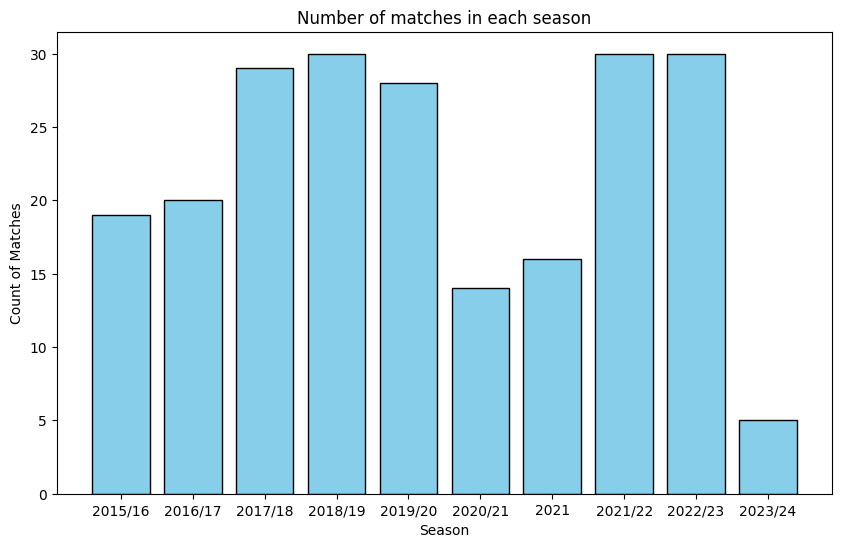

In [162]:
result = pd.DataFrame(df.groupby('season')['event match_number'].nunique())

plt.figure(figsize=(10,6))
plt.bar(result.index,result['event match_number'],color ='skyblue', edgecolor = 'black')
plt.xlabel('Season')
plt.ylabel('Count of Matches')
plt.title('Number of matches in each season')
plt.show()

### What is the most common venue for matches in the dataset?

In [163]:
most_common_venue = df['venue'].mode()[0]

print("The most common venue for matches in the dataset is:", most_common_venue)

The most common venue for matches in the dataset is: Dubai International Cricket Stadium


### Who has the highest number of 'Man of the Match' awards?

In [164]:
most_mom_awards = df['MOTM'].mode()[0]

print("The player with the highest number of 'Man of the Match' awards is:", most_mom_awards)

The player with the highest number of 'Man of the Match' awards is: Fakhar Zaman


### What is the average number of runs scored per match?

In [165]:
total_runs = df['Total Runs'].sum()

no_matches = pd.DataFrame(df.groupby('season')['event match_number'].nunique())['event match_number'].sum()

average_runs_per_match = round(total_runs / no_matches, 2)

print("Average number of runs scored per match:", average_runs_per_match)

Average number of runs scored per match: 362.32


### What is the average number of wickets taken per match?

In [166]:
total_wickets = df['Wickets'].sum()

no_matches = pd.DataFrame(df.groupby('season')['event match_number'].nunique())['event match_number'].sum()

average_wickets_per_match = round(total_wickets / no_matches, 2)

print("Average number of wickets taken per match:", average_wickets_per_match)

Average number of wickets taken per match: 14.28


### How many matches ended in a tie?

In [167]:
tied_matches = df[(df['Outcome_by_runs'] == 0) & (df['Outcome_by_wickets'] == 0)]

num_tied_matches = len(tied_matches)

print("Number of matches that ended in a tie:", num_tied_matches)

Number of matches that ended in a tie: 1234


## **2. Team Performance Analysis:**

### How many matches were won by the team winning the toss?

In [168]:
result = df[df['Toss Winner'] == df['Winner']].shape[0]
print('The number of matches won by the team winning the toss ',result)

The number of matches won by the team winning the toss  34309


### What is the average number of runs scored by each team per match?

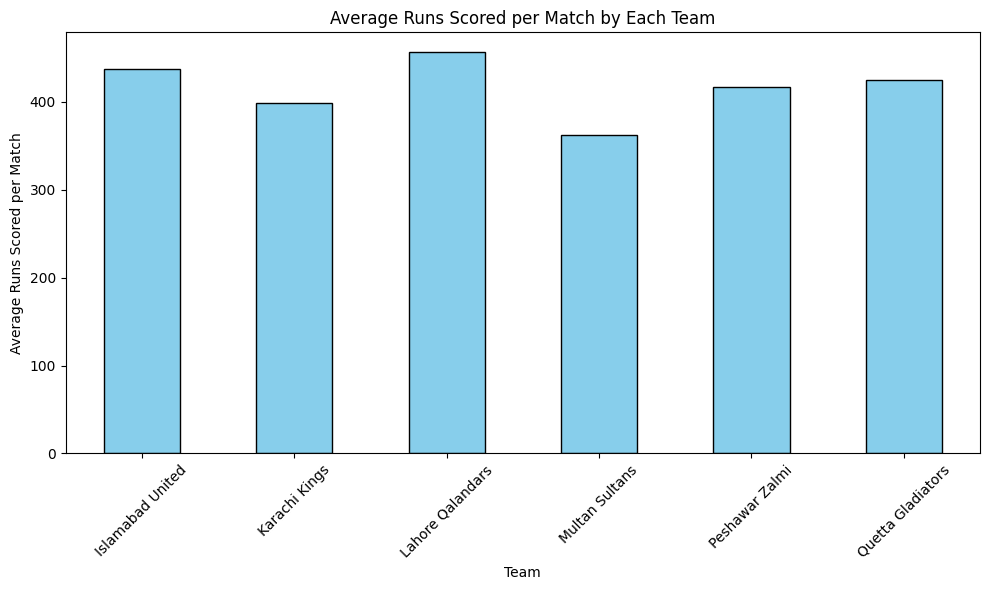

In [169]:
total_runs_per_team_per_match = df.groupby(['Team', 'event match_number'])['Total Runs'].sum()

total_matches_per_team = df.groupby('Team')['event match_number'].nunique()

average_runs_per_team_per_match = total_runs_per_team_per_match.groupby('Team').mean()

plt.figure(figsize=(10, 6))
average_runs_per_team_per_match.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Runs Scored per Match by Each Team')
plt.xlabel('Team')
plt.ylabel('Average Runs Scored per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 5 Runs Scorers**

In [179]:
top5_runs_scorer = pd.DataFrame(df.groupby('Batter')['Total Runs'].sum().sort_values(ascending=False)).head()

<Figure size 1000x600 with 0 Axes>

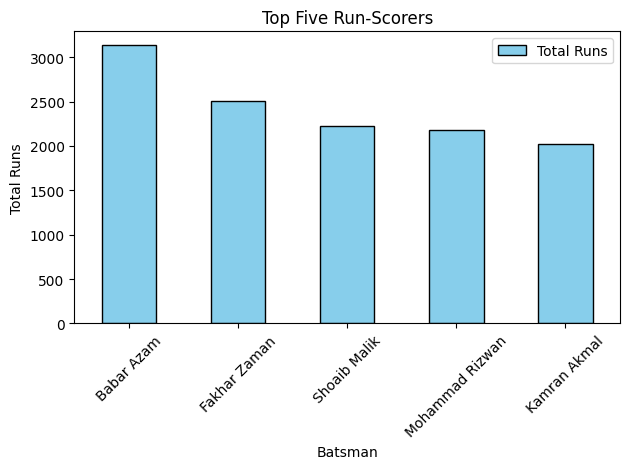

In [199]:
plt.figure(figsize=(10, 6))
top5_runs_scorer.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Five Run-Scorers')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 5 Wicket Takers**

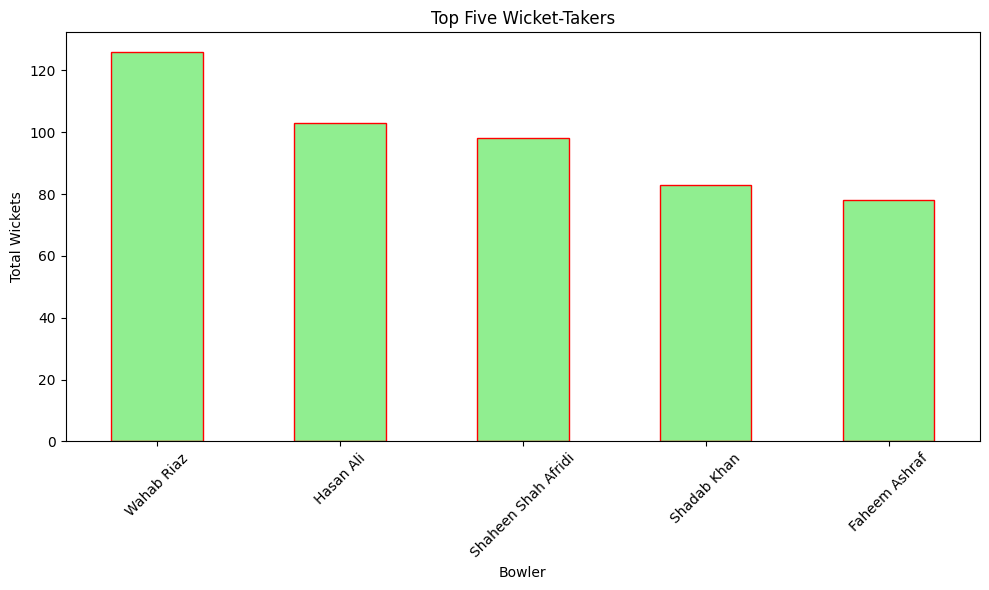

In [193]:
total_wickets_by_bowler = df.groupby('Bowler')['Wickets'].sum()
top_five_wicket_takers = total_wickets_by_bowler.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_five_wicket_takers.plot(kind='bar', color='lightgreen', edgecolor='red')
plt.title('Top Five Wicket-Takers')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()